In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')
import os
import re

In [1]:
!pip install squarify

In [14]:
# assign directory
directory = 'C:\\Users\\cheth\\OneDrive\\Professional\\MTech\\PSephology\\UP Elections\\Data Extraction\\2002\\Individual AC Data'

res = pd.DataFrame(columns=['AC_Name','# #','Position','Name','Votes','Votes %','Party'])

# iterate over files in that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    name, extension = os.path.splitext(f)
    # checking if it is a file
    if os.path.isfile(f):
        df = pd.read_excel(f, sheet_name = 0, skiprows = 0)
        df['AC_Name'] = filename.split('.')[0]
        res = res.append(df)
        
res = res.reset_index()

In [15]:
res.head()

index    AC_Name # # Position          Name Votes Votes %  \
0      0  Afzalgarh   1       12   Anis Ansari   720    0.4%   
1      1  Afzalgarh   2       13    Arun Kumar   676    0.4%   
2      2  Afzalgarh   3       22  Chirangi Lal   284    0.2%   
3      3  Afzalgarh   4       20      Damyanti   367    0.2%   
4      4  Afzalgarh   5       19       Dayaram   416    0.3%   

                        Party    #      
0             Jharkhand Party      NaN  
1  Nationalist Congress Party      NaN  
2    Rashtriya Parivartan Dal      NaN  
3      Rashtriya Kranti Party      NaN  
4                 Independent      NaN

In [17]:
#improper_df = res[res['AC Name'].notnull()]
#improper_df['AC_Name'].unique()

In [18]:
df = res

In [24]:
df.columns[8]

'\xa0\xa0#\xa0\xa0\xa0\xa0'

In [25]:
df = df.drop(['# #', df.columns[8]],axis=1)
df.head()

index    AC_Name Position          Name Votes Votes %  \
0      0  Afzalgarh       12   Anis Ansari   720    0.4%   
1      1  Afzalgarh       13    Arun Kumar   676    0.4%   
2      2  Afzalgarh       22  Chirangi Lal   284    0.2%   
3      3  Afzalgarh       20      Damyanti   367    0.2%   
4      4  Afzalgarh       19       Dayaram   416    0.3%   

                        Party  
0             Jharkhand Party  
1  Nationalist Congress Party  
2    Rashtriya Parivartan Dal  
3      Rashtriya Kranti Party  
4                 Independent

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     5455 non-null   int64 
 1   AC_Name   5455 non-null   object
 2   Position  5455 non-null   object
 3   Name      5455 non-null   object
 4   Votes     5455 non-null   object
 5   Votes %   5455 non-null   object
 6   Party     5455 non-null   object
dtypes: int64(1), object(6)
memory usage: 298.4+ KB


In [28]:
df.isnull().sum()

index       0
AC_Name     0
Position    0
Name        0
Votes       0
Votes %     0
Party       0
dtype: int64

In [29]:
df.sort_values('Position')

index     AC_Name Position                  Name   Votes Votes %  \
2558      6    Kaimganj        1        Luis Khursheed  34,908   23.1%   
1160     10      Charda        1               Shabbir  46,927   38.7%   
4878      5   Shikarpur        1     Munshi Lal Gautam  29,175   30.1%   
1163      1   Charkhari        1         Ambesh Kumari  25,061   23.3%   
511       8     Bansdih        1  Ram Govind Chowdhari  43,098   31.5%   
...     ...         ...      ...                   ...     ...     ...   
1332     20     Dadraul       26           Ram Kishore     158    0.1%   
4890      6  Shikohabad       26        Givind Krishna      97    0.1%   
4888      4  Shikohabad       26          Daya Shankar      97    0.1%   
4905     21  Shikohabad       28        Rajneesh Kumar      87    0.1%   
4897     13  Shikohabad       29       Maheshwer Singh      77    0.1%   

                                   Party  
2558            Indian National Congress  
1160                     Samajwadi Party  
4878               Bharatiya Janta Party  
1163                     Samajwadi Party  
511   Samajwadi Janata Party (RASHTRIYA)  
...                                  ...  
1332                         Independent  
4890                         Independent  
4888                         Independent  
4905                         Independent  
4897                         Independent  

[5455 rows x 7 columns]

In [30]:
df.index

RangeIndex(start=0, stop=5455, step=1)

In [31]:
for i, row in df.iterrows():
    val = str(df.at[i, 'Votes'])
    if ',' in val:
        df.at[i, 'Votes'] = df.at[i, 'Votes'].replace(',', '')

In [32]:
df['Votes'] = df['Votes'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5455 entries, 0 to 5454
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     5455 non-null   int64 
 1   AC_Name   5455 non-null   object
 2   Position  5455 non-null   object
 3   Name      5455 non-null   object
 4   Votes     5455 non-null   int64 
 5   Votes %   5455 non-null   object
 6   Party     5455 non-null   object
dtypes: int64(2), object(5)
memory usage: 298.4+ KB


In [33]:
df_p_1 = df[df['Position']==1.0]
df_p_1

index              AC_Name Position  \
7         7            Afzalgarh        1   
26        2                Agota        1   
39        5      Agra Cantonment        1   
55        7            Agra East        1   
71        7            Agra West        1   
...     ...                  ...      ...   
5393      4  Varanasi Cantonment        1   
5406      1       Varanasi North        1   
5423      8       Varanasi South        1   
5427      2           Zahoorabad        1   
5446      7              Zamania        1   

                                     Name  Votes Votes %  \
7                               Indra Dev  41532   24.8%   
26                        Kiran Pal Singh  45557   38.7%   
39                       Mohammad Basheer  32182   35.5%   
55                      Jagan Prasad Garg  30515   38.4%   
71                      Dr.Ram Babu Harit  32816   40.7%   
...                                   ...    ...     ...   
5393  Harish Chand Srivastava (harish Ji)  41426   31.1%   
5406                          Abdul Kalam  56805   52.5%   
5423       Shyam Dew Rai Chaudhari (dada)  43458   52.6%   
5427                          Kali Charan  56504   37.1%   
5446                              Kailash  50379   33.8%   

                      Party  
7     Bharatiya Janta Party  
26          Samajwadi Party  
39      Bahujan Samaj Party  
55    Bharatiya Janta Party  
71    Bharatiya Janta Party  
...                     ...  
5393  Bharatiya Janta Party  
5406        Samajwadi Party  
5423  Bharatiya Janta Party  
5427    Bahujan Samaj Party  
5446        Samajwadi Party  

[398 rows x 7 columns]

In [34]:
df_p_1['Votes %'] = df_p_1['Votes %'].str.replace("%","")

In [35]:
df_p_1['Votes %'] = df_p_1['Votes %'].astype('float64')
df_p_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 7 to 5446
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     398 non-null    int64  
 1   AC_Name   398 non-null    object 
 2   Position  398 non-null    object 
 3   Name      398 non-null    object 
 4   Votes     398 non-null    int64  
 5   Votes %   397 non-null    float64
 6   Party     398 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 24.9+ KB


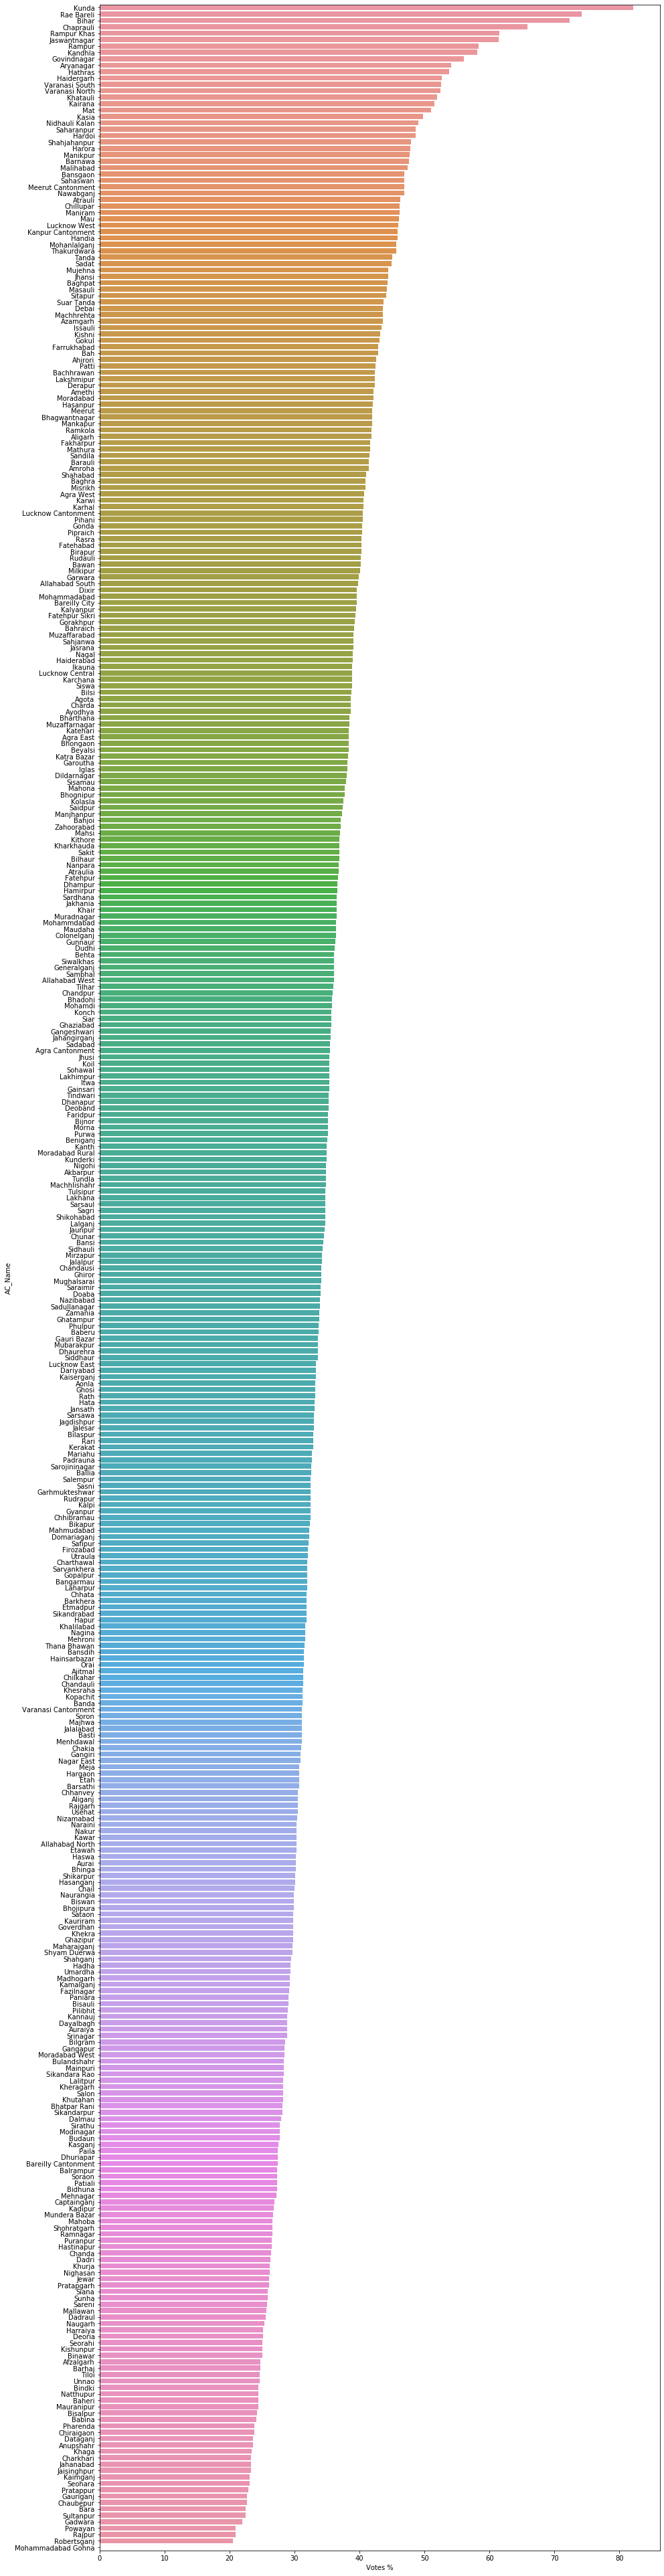

In [36]:
plt.figure(figsize=(15,70))
sns.barplot(x='Votes %', y='AC_Name',data=df_p_1,order=df_p_1.sort_values('Votes %',ascending=False)["AC_Name"],orient="h")
plt.show()

In [37]:
df_c_r = df[(df['Position'] == 1.0) | (df['Position'] == 2.0)]
df_c_r.head()

index          AC_Name Position                   Name  Votes Votes %  \
7       7        Afzalgarh        1              Indra Dev  41532   24.8%   
13     13        Afzalgarh        2         Mohammad Ghazi  40805   24.3%   
26      2            Agota        1        Kiran Pal Singh  45557   38.7%   
33      9            Agota        2  Virendra Singh Sirohi  32065   27.3%   
38      4  Agra Cantonment        2            Kesho Mehra  30662   33.9%   

                    Party  
7   Bharatiya Janta Party  
13    Bahujan Samaj Party  
26        Samajwadi Party  
33  Bharatiya Janta Party  
38  Bharatiya Janta Party

In [38]:
df_c_r['Votes'] = df_c_r['Votes'].astype('int64')
df_c_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 7 to 5446
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     796 non-null    int64 
 1   AC_Name   796 non-null    object
 2   Position  796 non-null    object
 3   Name      796 non-null    object
 4   Votes     796 non-null    int64 
 5   Votes %   796 non-null    object
 6   Party     796 non-null    object
dtypes: int64(2), object(5)
memory usage: 49.8+ KB


In [40]:
import plotly.express as px
plt.figure(figsize=(12,12))
fig = px.treemap(df_c_r, 
                 path=[px.Constant('all'), 'AC_Name','Party'], 
                 values='Votes',
                 color='Party')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<Figure size 864x864 with 0 Axes>

In [41]:
df_c_r1 = df_c_r[df_c_r['Position'] == 1.0]
df_c_r1.head()

index          AC_Name Position               Name  Votes Votes %  \
7       7        Afzalgarh        1          Indra Dev  41532   24.8%   
26      2            Agota        1    Kiran Pal Singh  45557   38.7%   
39      5  Agra Cantonment        1   Mohammad Basheer  32182   35.5%   
55      7        Agra East        1  Jagan Prasad Garg  30515   38.4%   
71      7        Agra West        1  Dr.Ram Babu Harit  32816   40.7%   

                    Party  
7   Bharatiya Janta Party  
26        Samajwadi Party  
39    Bahujan Samaj Party  
55  Bharatiya Janta Party  
71  Bharatiya Janta Party

In [42]:
df_c_r1.sort_values('Votes', ascending=False, inplace=True)
df_c_r1

index       AC_Name Position                                      Name  \
2029      0   Govindnagar        1                               Ajay Kapoor   
4312      0    Rae Bareli        1                      Akhilesh Kumar Singh   
3053      2         Kunda        1  Kunwar Raghuraj Pratap Singh Raja Bhaiya   
849       9         Bihar        1                                   Ramnath   
5216      3   Thakurdwara        1         Kunwar Sarvesh Kumar Alias Rakesh   
...     ...           ...      ...                                       ...   
2983      5     Kishunpur        1                            Krishna Paswan   
4351      9        Rajpur        1                            Mahesh Chandra   
1731      5       Gadwara        1                                  Raja Ram   
1163      1     Charkhari        1                             Ambesh Kumari   
3188     13  Lucknow East        1                         Vidya Sagar Gupta   

       Votes Votes %                     Party  
2029  117208   56.1%  Indian National Congress  
4312  115869   74.2%  Indian National Congress  
3053   88446   82.1%               Independent  
849    88378   72.3%               Independent  
5216   87318   45.7%     Bharatiya Janta Party  
...      ...     ...                       ...  
2983   27274   25.1%     Bharatiya Janta Party  
4351   26626   20.9%               Independent  
1731   25876   22.0%      Lok Jan Shakti Party  
1163   25061   23.3%           Samajwadi Party  
3188   23429   33.3%     Bharatiya Janta Party  

[398 rows x 7 columns]

In [48]:
df_c_r1['Party'].value_counts()

SP                                    141
BSP                                    97
BJP                                    87
INC                                    25
Ind                                    16
RLD                                    14
Rashtriya Kranti Party                  4
Janata Dal (United)                     2
Communist Party Of India (MARXIST)      2
Apna Dal                                2
ABLTC                                   2
Rashtriya Parivartan Dal                1
Akhil Bharat Hindu Mahasabha            1
Lok Jan Shakti Party                    1
Samajwadi Janata Party (RASHTRIYA)      1
National Loktantrik Party               1
Jharkhand Party                         1
Name: Party, dtype: int64

In [49]:
df_c_r1.replace({'Party': {'Bharatiya Janta Party': 'BJP',
                           'Samajwadi Party': 'SP',
                           'Bahujan Samaj Party':'BSP',
                           'Apna Dal (Soneylal)':'AD',
                           'Indian National Congress':'INC',
                           'Suheldev Bhartiya Samaj Party':'SBSP',
                           'Independent':'Ind',
                           'Ittehad-E-Millait Council':'IC',
                           'Nirbal Indian Shoshit Hamara Aam Dal':'NISHAD',
                           'Nationalist Congress Party': 'NCP',
                           'Rashtriya Lok Dal':'RLD',
                           'Peace Party' : 'PP',
                           'Quami Ekta Dal': 'QED',
                           'Akhil Bhartiya Lok Tantrik Congress':'ABLTC',
                           'Rashtriya Kranti Party':'RKP',
                           'Janata Dal (United)':'JDU',
                           'Communist Party Of India (MARXIST)':'CPI',
                           'Rashtriya Parivartan Dal':'RPD',
                           'Akhil Bharat Hindu Mahasabha':'ABHM',
                           'Lok Jan Shakti Party':'LJSP',
                           'Samajwadi Janata Party (RASHTRIYA)':'SJPR',
                           'National Loktantrik Party':'NLP',
                           'Jharkhand Party':'JP'
                           
                          }},inplace=True)

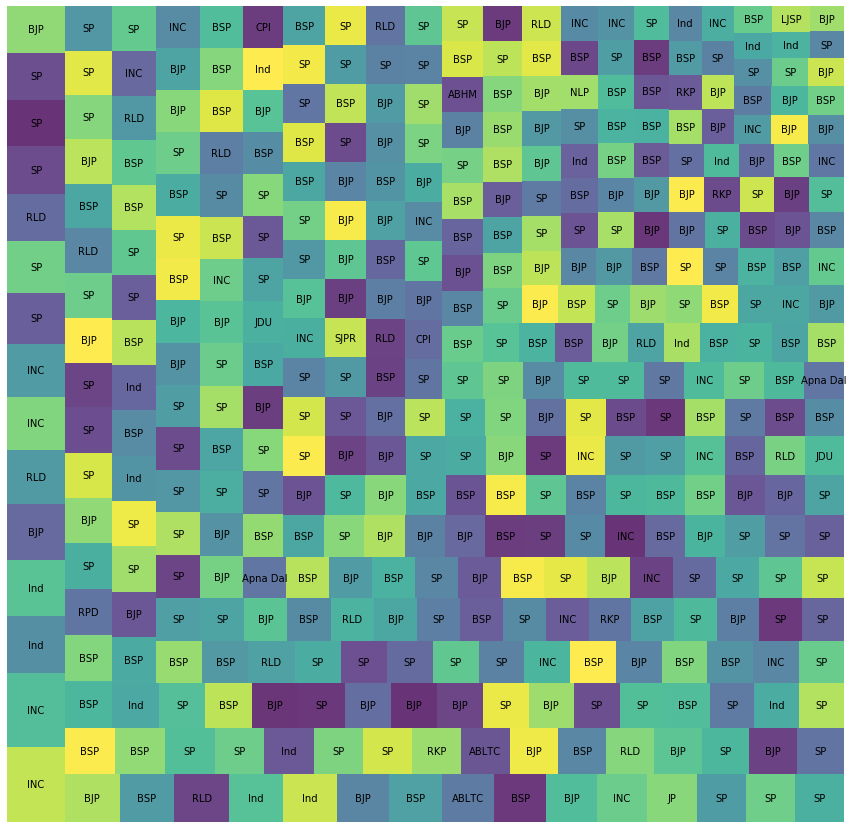

In [50]:
fig, ax = plt.subplots(1, figsize = (15,15))
squarify.plot(sizes=df_c_r1['Votes'], 
              label=df_c_r1['Party'],
              alpha=.8 )
plt.axis('off')
plt.show()

In [51]:
df_final = df[(df['Position'] == 1.0) | (df['Position'] == 2.0)]

In [52]:
df_final.sort_values(['AC_Name', 'Votes'], inplace=True)
df_final['diffs'] = df_final.groupby('AC_Name')['Votes'].diff()
df_final['diffs'] = df_final['diffs'].fillna(value=0)

In [53]:
plt.figure(figsize=(20,20))
fig = px.treemap(df_final, 
                 path=[px.Constant('all'), 'Party','AC_Name'], 
                 values='diffs',
                 color='Party',
                 color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [54]:
X = df_final[df_final['diffs'] > 0]['diffs'].unique()
X = X.reshape(-1, 1)

In [55]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 
print(label)

[0 3 0 3 3 0 0 3 0 1 0 0 3 1 3 0 0 1 1 1 0 0 1 1 3 0 1 3 1 1 0 3 3 3 0 0 0
 0 1 0 0 3 3 3 0 3 1 3 3 3 3 0 3 1 1 1 3 0 3 0 3 3 2 3 0 1 3 0 3 0 0 1 3 0
 0 0 0 0 3 0 0 0 0 3 2 3 0 0 0 3 0 3 3 3 3 1 0 0 3 0 3 0 3 1 3 0 3 3 0 3 3
 1 0 0 3 1 3 0 0 0 0 3 0 1 0 3 0 3 1 3 3 3 3 3 0 0 0 0 0 0 0 3 3 3 0 1 0 2
 0 3 0 3 1 0 3 1 3 1 0 1 0 0 1 0 0 1 1 3 3 1 3 3 0 0 0 0 3 0 0 3 1 2 0 0 1
 1 0 0 3 0 0 3 0 1 3 3 3 0 3 0 1 0 0 0 0 0 0 0 0 1 1 3 0 3 0 3 3 0 3 3 3 3
 3 2 1 0 0 0 0 0 3 3 3 0 3 0 1 0 3 3 0 3 0 0 3 1 0 1 1 0 1 0 0 3 0 1 0 0 1
 3 0 3 3 3 0 3 1 0 0 3 0 3 1 3 3 3 0 3 3 1 0 0 3 3 3 0 0 0 0 0 0 3 0 1 0 1
 0 0 0 0 3 0 0 0 1 0 0 0 3 1 0 0 0 3 3 2 1 0 1 3 1 2 3 3 3 0 1 3 0 3 3 3 0
 1 3 3 1 3 0 0 1 1 3 3 0 0 0 3 0 3 3 0 0 3 0 1 1 0 0 0 3 0 0 0 3 3 0 0 3 1
 0 3 0 3 0 1 0 0 3 0 3 0 0 0 0 0 0 0 3 0 3 1 1 0 3]


In [56]:
df1 = pd.DataFrame(X)
df1['label'] = label
df1.rename(columns={0: 'diffs'}, inplace=True)

No handles with labels found to put in legend.


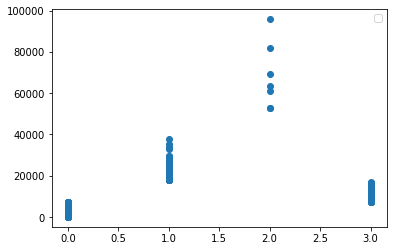

In [57]:
plt.scatter(df1['label'], df1['diffs'])
plt.legend()
plt.show()

In [59]:
df_res = pd.merge(df1, df_final, how='left', on='diffs')

In [60]:
df_res.shape

(398, 9)

In [61]:
df_res['label'] = df_res.label.map({1.0:'Safe',
                2.0:'Safe',
                3.0:'Favorable',
                0.0:'Battle-Ground'})
df_res

diffs          label  index              AC_Name Position  \
0      727.0  Battle-Ground      7            Afzalgarh        1   
1    13492.0      Favorable      2                Agota        1   
2     1520.0  Battle-Ground      5      Agra Cantonment        1   
3    12749.0      Favorable      7            Agra East        1   
4     7949.0      Favorable      7            Agra West        1   
..       ...            ...    ...                  ...      ...   
393  12697.0      Favorable      4  Varanasi Cantonment        1   
394  19537.0           Safe      1       Varanasi North        1   
395  20805.0           Safe      8       Varanasi South        1   
396   6223.0  Battle-Ground      2           Zahoorabad        1   
397   8288.0      Favorable      7              Zamania        1   

                                    Name  Votes Votes %                  Party  
0                              Indra Dev  41532   24.8%  Bharatiya Janta Party  
1                        Kiran Pal Singh  45557   38.7%        Samajwadi Party  
2                       Mohammad Basheer  32182   35.5%    Bahujan Samaj Party  
3                      Jagan Prasad Garg  30515   38.4%  Bharatiya Janta Party  
4                      Dr.Ram Babu Harit  32816   40.7%  Bharatiya Janta Party  
..                                   ...    ...     ...                    ...  
393  Harish Chand Srivastava (harish Ji)  41426   31.1%  Bharatiya Janta Party  
394                          Abdul Kalam  56805   52.5%        Samajwadi Party  
395       Shyam Dew Rai Chaudhari (dada)  43458   52.6%  Bharatiya Janta Party  
396                          Kali Charan  56504   37.1%    Bahujan Samaj Party  
397                              Kailash  50379   33.8%        Samajwadi Party  

[398 rows x 9 columns]

In [62]:
df_second = df_final[df_final['Position'] == 2]
dict_cols = {'Name':'2_Name', 'Votes':'2_Votes', 'Votes %': '2_Votes %', 'Party':'2_party'}
df_second.rename(columns=dict_cols, inplace=True)
df_second = df_second[['AC_Name', '2_Name', '2_Votes', '2_Votes %', '2_party']].sort_values('AC_Name')
df_second.head()

AC_Name                 2_Name  2_Votes 2_Votes %  \
13        Afzalgarh         Mohammad Ghazi    40805     24.3%   
33            Agota  Virendra Singh Sirohi    32065     27.3%   
38  Agra Cantonment            Kesho Mehra    30662     33.9%   
53        Agra East         Govind Agrawal    17766     22.4%   
69        Agra West  Dharm Prakah Bhartiya    24867     30.8%   

                     2_party  
13       Bahujan Samaj Party  
33     Bharatiya Janta Party  
38     Bharatiya Janta Party  
53  Indian National Congress  
69       Bahujan Samaj Party

In [63]:
df_res = df_res.sort_values('AC_Name')
df_res.head()

diffs          label  index          AC_Name Position               Name  \
0    727.0  Battle-Ground      7        Afzalgarh        1          Indra Dev   
1  13492.0      Favorable      2            Agota        1    Kiran Pal Singh   
2   1520.0  Battle-Ground      5  Agra Cantonment        1   Mohammad Basheer   
3  12749.0      Favorable      7        Agra East        1  Jagan Prasad Garg   
4   7949.0      Favorable      7        Agra West        1  Dr.Ram Babu Harit   

   Votes Votes %                  Party  
0  41532   24.8%  Bharatiya Janta Party  
1  45557   38.7%        Samajwadi Party  
2  32182   35.5%    Bahujan Samaj Party  
3  30515   38.4%  Bharatiya Janta Party  
4  32816   40.7%  Bharatiya Janta Party

In [69]:
df_res.shape 
df_second.shape 

(398, 5)

In [65]:
df_res = pd.merge(df_res, df_second, how='inner', on='AC_Name')

In [68]:
df_res.to_excel('2002_Analysis_1.xlsx')

In [67]:
plt.figure(figsize=(20,20))
fig = px.treemap(df_res, 
                 path=[px.Constant('all'), 'Party','AC_Name','label'], 
                 values='diffs',
                 color='label',
                 color_discrete_map={'Safe':'#BCEE68', 'Favorable':'#00EEEE', 'Battle-Ground':'#EE4000'})
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<Figure size 1440x1440 with 0 Axes>